In [2]:
import osmnx as ox
import pandas as pd
import geopandas as gdp

from sklearn.cluster import SpectralClustering
import numpy as np
import networkx as nx
import os
import sys
import pickle

from shapely.geometry import Polygon, MultiPolygon
from descartes import PolygonPatch

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib import ticker
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors



In [3]:
ROOT_DIR = "/home/charles/Projects/QcMtlStreets"

In [4]:
sys.path.append(os.path.join(ROOT_DIR, "Python"))   
sys.path.append("/home/charles/Projects/alluvial_diagram")   
from OsmnxElev import *

In [5]:
#osmnx graph with neigh
graphQc=loadGraphElevGradesNeighQc()

listNeigh=["Saint-Jean-Baptiste",\
                              "Saint-Roch",\
                              "Vieux-Québec/Cap-Blanc/Colline parlementaire",\
                              "Montcalm",\
                              "Saint-Sauveur"]

File exists => reading graph


In [8]:
getAllDirectedEdgesQc

<function OsmnxElev.OsmnxCuts.osmnxNeighCut.getAllDirectedEdgesQc(listNeigh=['Saint-Jean-Baptiste', 'Saint-Roch', 'Montcalm', 'Vieux-Québec/Cap-Blanc/Colline parlementaire'])>

In [7]:
dfBridgesCounts=pd.DataFrame( dfEdgesAllWithIdx.pairIdx.value_counts() ).reset_index()
dfBridgesCounts["startIdx"]=[ i[0] for i in dfBridgesCounts["index"].values]
dfBridgesCounts["endIdx"]=[ i[1] for i in dfBridgesCounts["index"].values]

NameError: name 'dfEdgesAllWithIdx' is not defined

In [ ]:
dfBridgesCounts=pd.merge(dfBridgesCounts,dfNeighWithIdx, 
         how="left" ,
         left_on="startIdx", right_on="neighIdx")

dfBridgesCounts=pd.merge(dfBridgesCounts,dfNeighWithIdx, 
         how="left" ,
         left_on="endIdx", right_on="neighIdx")

In [ ]:
dfAdjMatrix=dfBridgesCounts[["neighIdx_x","neighIdx_y","pairIdx"]].pivot(index="neighIdx_x",columns="neighIdx_y")

In [122]:

levels = dfAdjMatrix.columns.droplevel()
dfAdjMatrix.columns = levels
dfAdjMatrix

neighIdx_y     1     2     3
neighIdx_x                  
0           19.0   2.0  31.0
1            NaN  16.0  67.0
2            NaN   NaN  17.0

In [134]:
dfAdjMatrixSquare=np.nan_to_num(np.matrix(np.transpose(dfAdjMatrix)))+ \
np.nan_to_num(np.matrix(dfAdjMatrix))

In [138]:
 dfAdjMatrixSquare

matrix([[38.,  2., 31.],
        [ 2., 32., 67.],
        [31., 67., 34.]])

In [141]:
SpectralClustering(n_clusters=2,affinity="precomputed").fit_predict(dfAdjMatrixSquare)
                   

array([1, 0, 0], dtype=int32)

In [142]:
listNeigh=["Saint-Jean-Baptiste",\
                              "Saint-Roch",\
                              "Vieux-Québec/Cap-Blanc/Colline parlementaire",\
                              "Montcalm",\
                              "Saint-Sauveur"]

In [145]:
graphQc=loadGraphElevGradesNeighQc()

File exists => reading graph


In [148]:
qcCentral,listNodes=getSubgraphListNeighOneGraph(graphQc,listNeigh)

In [149]:
type(qcCentral)

networkx.classes.multidigraph.MultiDiGraph

In [153]:
adjMatrixCentral=nx.adjacency_matrix(qcCentral)

In [154]:
adjMatrixCentral

<9807x9807 sparse matrix of type '<class 'numpy.int64'>'
	with 19680 stored elements in Compressed Sparse Row format>

In [155]:
SpectralClustering(n_clusters=2,affinity="precomputed").fit_predict(adjMatrixCentral)
                   

/home/charles/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/validation.py:892: UserWarning:

Array is not symmetric, and will be converted to symmetric by average with its transpose.

/home/charles/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [158]:
adjMatrixCentralMat=adjMatrixCentral.todense()

In [162]:
np.allclose(adjMatrixCentralMat, adjMatrixCentralMat.T, rtol=10**-4,atol=10**-4)

False

In [174]:
np.sum(adjMatrixCentralMat-adjMatrixCentralMat.T)

0

In [166]:
qcCentralBis=qcCentral.to_directed()
adjMatrixCentralBis=nx.adj_matrix(qcCentralBis)
adjMatrixCentralBisMat=adjMatrixCentralBis.todense()

In [167]:
np.allclose(adjMatrixCentralBisMat, adjMatrixCentralBisMat.T, rtol=10**-4,atol=10**-4)

False

In [173]:
np.sum(adjMatrixCentralBisMat-adjMatrixCentralBisMat.T)

0

In [168]:
qcCentralBis2=qcCentral.to_undirected()
adjMatrixCentralBis2=nx.adj_matrix(qcCentralBis2)
adjMatrixCentralBisMat2=adjMatrixCentralBis2.todense()

In [180]:
np.allclose(adjMatrixCentralBisMat2, adjMatrixCentralBisMat2.T,atol=10**-3)

True

In [179]:
np.allclose(adjMatrixCentralBisMat, adjMatrixCentralBisMat.T,atol=10**-3)

False

In [171]:
np.sum(adjMatrixCentralBisMat-adjMatrixCentralBisMat.T)

0

In [176]:
np.max(adjMatrixCentralBisMat-adjMatrixCentralBisMat.T)

1

In [177]:
np.max(adjMatrixCentralBisMat2-adjMatrixCentralBisMat2.T)

0

In [200]:
listComponents=[g for g in nx.connected_components(qcCentral.to_undirected()) ]

In [201]:
len(listComponents) #list of sets

37

In [202]:
np.argmax([len(s) for s in listComponents])

0

In [248]:
qcCentralMaxSubgraph=nx.induced_subgraph(qcCentral.to_undirected(),\
                                               nbunch=listComponents[0])

In [204]:
adjMatConn=nx.adj_matrix(qcCentralMaxSubgraph).todense()

In [207]:
normCutAssign=SpectralClustering(n_clusters=2,affinity="precomputed").fit_predict(adjMatConn)

In [230]:
adjMatConn.shape

(9519, 9519)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

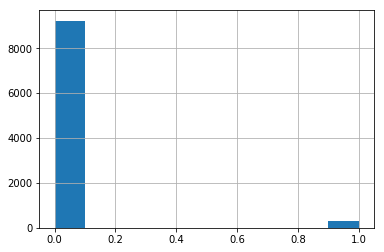

In [209]:
pd.Series(normCutAssign).hist()

In [220]:
pd.DataFrame({"cut":normCutAssign}).reset_index().groupby("cut")["index"].nunique()

cut
0    9227
1     292
Name: index, dtype: int64

In [357]:
listNodesCutFirst=np.array([n for n,data in qcCentralMaxSubgraph.nodes.data()])[normCutAssign==1]
listNodesCutSecond=np.array([n for n,data in qcCentralMaxSubgraph.nodes.data()])[normCutAssign==0]
len(listNodesCutFirst)

292

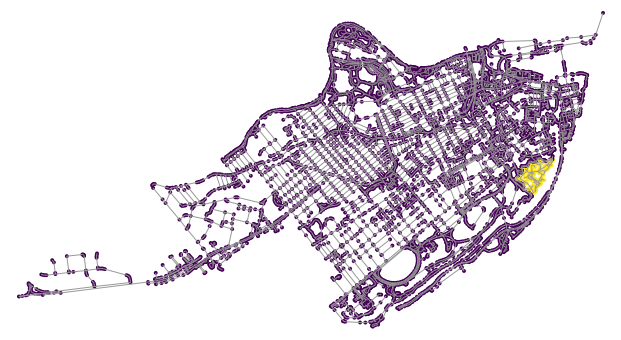

(<Figure size 1175.65x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa07790f5c0>)

In [223]:
ox.plot_graph(qcCentralMaxSubgraph,
             node_color=normCutAssign)

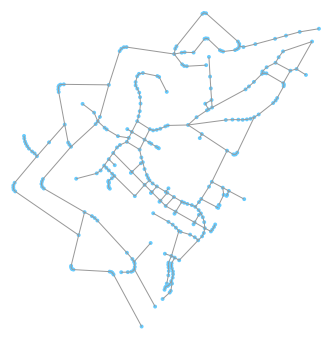

(<Figure size 615.095x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9f137f30b8>)

In [345]:
citadelGraph=ox.utils.induce_subgraph(qcCentralMaxSubgraph, listNodesCutFirst )
ox.plot_graph(citadelGraph)

In [358]:
getDfEdgesCut(qcCentralMaxSubgraph, listNodesCutSecond, listNodesCutFirst )

startNode     endNode
0  343554773  3954211745

In [1]:
dictDegrees=dict(nx.degree(citadelGraph))
len(dictDegrees)
sns.distplot( [int(l) for l in dictDegrees.values()] , kde=False)

NameError: name 'nx' is not defined

In [ ]:
#Same analysis but on the simplified graph

In [227]:
graphQcSimple=ox.simplify_graph(graphQc)
qcCentralSimple,listNodes=getSubgraphListNeighOneGraph(graphQcSimple,listNeigh)

In [228]:
adjMatSimple=nx.adj_matrix(qcCentralSimple.to_undirected()).todense()

In [229]:
adjMatSimple.shape

(3052, 3052)

In [233]:
listComponentsSimple=[g for g in nx.connected_components(qcCentralSimple.to_undirected()) ]
idxMaxSimpleCom=np.argmax( [len(l) for l in listComponentsSimple])
idxMaxSimpleCom

0

In [250]:
qcCentralSimpleConnected=ox.utils.induce_subgraph( qcCentralSimple.to_undirected(), node_subset=listComponentsSimple[idxMaxSimpleCom])

In [251]:
adjMatSimpleConnected=nx.adj_matrix(qcCentralSimpleConnected.to_undirected()).todense()

In [252]:
normCutAssignSimple=SpectralClustering(n_clusters=2,affinity="precomputed").fit_predict(adjMatSimpleConnected)

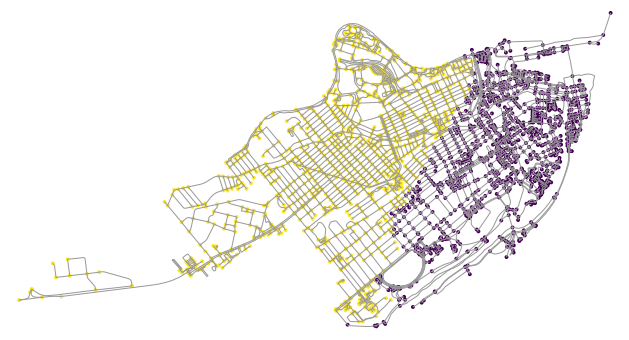

(<Figure size 1190.61x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9f164be668>)

In [253]:
ox.plot_graph(qcCentralSimpleConnected,
             node_color=normCutAssignSimple)

In [284]:
dictNodesDegrees=dict(nx.degree(qcCentralSimpleConnected))
type(dictNodesDegrees)

dict

In [292]:
print(2302763016  in dictNodesDegrees.keys())
listDegrees=[ v for v in dictNodesDegrees.values()]
listDegrees[:2]

True


[5, 3]

In [287]:
#[(n,dat) for n,dat in qcCentralSimpleConnected.nodes.data()]

In [288]:
for n,dat in qcCentralSimpleConnected.nodes.data():
    if n ==3950706959:
        print(n, dat,dictNodesDegrees[n])
        break
    if n in dictNodesDegrees.keys():
        dat["degree"]=dictNodesDegrees[n]
    else:
        print("Weird error, node", n , " is not in qcCentralSimpleConnected list of nodes")

In [361]:
len(nx.get_edge_attributes(qcCentralSimpleConnected,name="elevation"))

2958

In [290]:
[  dat for n,dat in qcCentralSimpleConnected.nodes.data()][:2]

[{'x': -71.2153963,
  'highway': 'traffic_signals',
  'Neighbourhood': 'Vieux-Québec/Cap-Blanc/Colline parlementaire',
  'elevation': 5.782,
  'y': 46.8165129,
  'osmid': 2302763016,
  'degree': 5},
 {'y': 46.8177904,
  'elevation': 5.746,
  'Neighbourhood': 'Vieux-Québec/Cap-Blanc/Colline parlementaire',
  'osmid': 2302763022,
  'x': -71.2154746,
  'degree': 3}]

In [297]:
from matplotlib import cm
cNorm=colors.Normalize(vmin=np.min(listDegrees),
                vmax=np.max(listDegrees))
cmMap=cm.ScalarMappable(norm=cNorm, cmap=cm.plasma)   
listColorsNodeDegrees=[ cmMap.to_rgba(d) for d in listDegrees ]

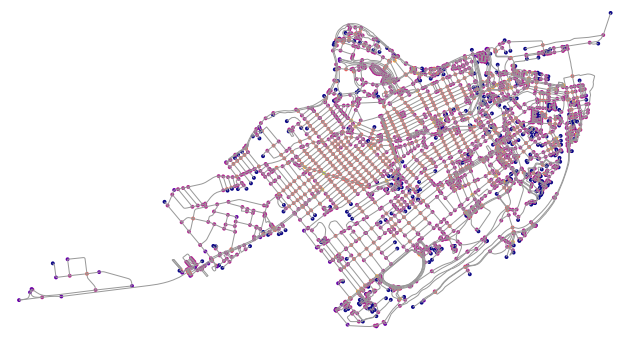

(<Figure size 1190.61x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa074bc2ba8>)

In [299]:
ox.plot_graph( qcCentralSimpleConnected, 
             node_color=listColorsNodeDegrees)

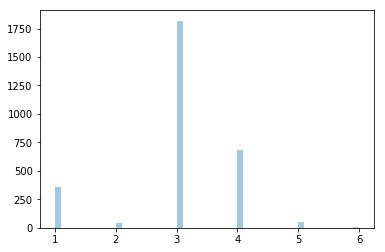

In [321]:
sns.distplot(listDegrees,hist=True,kde=False)

In [315]:
pd.DataFrame({"cols": listColorsNodeDegrees } ).reset_index().groupby("cols").nunique()

index  cols
cols                                            
(0.050383, 0.029803, 0.527975, 1.0)    362     1
(0.417642, 0.000564, 0.65839, 1.0)      46     1
(0.69284, 0.165141, 0.564522, 1.0)    1819     1
(0.881443, 0.392529, 0.383229, 1.0)    679     1
(0.940015, 0.975158, 0.131326, 1.0)      3     1
(0.98826, 0.652325, 0.211364, 1.0)      49     1